<a href="https://colab.research.google.com/github/Sujal-vajire/Machine-learning-models/blob/main/Multivariate_Linear_Regression2_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multivariate Linear Regression
## Predicting Load from displacement and capacitance


### Import Libraries

In [3]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import pandas as pd


### Read Data

In [4]:
data = pd.read_csv('NewB.csv',)

In [5]:
data.shape

(100, 3)

### Normalize Data

In [6]:
data = normalize(data, axis=0)

### Seperate Data into X and Y

In [7]:
X = data[:, 0:2]
Y = data[:, 2:]

### Visualize the Data

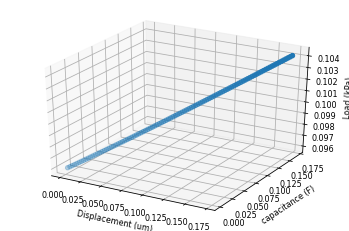

In [8]:
# Fixing random state for reproducibility
np.random.seed(19680801)
plt.rcParams.update({'font.size': 8})
resolution_value = 600
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = X[:, 0]
ys = X[:, 1]
zs = Y
ax.scatter(xs, ys, zs)

ax.set_xlabel('Displacement (um)')
ax.set_ylabel('capacitance (F)')
ax.set_zlabel('Load (kPa)')
#plt.savefig("myImage.png", format="png", dpi=resolution_value)

plt.show()

### Hyperparameters

In [9]:
learning_rate = 0.09
max_iteration = 500

In [10]:
s_learning_rate = 0.06
s_max_iteration = 500

In [11]:

mb_learning_rate = 0.09
mb_max_iteration = 500
batch_size = 16

### Parameters

In [12]:
theta = np.zeros((data.shape[1], 1))
s_theta = np.zeros((data.shape[1], 1))
mb_theta = np.zeros((data.shape[1], 1))

### Hypothesis

In [13]:
def h (theta, X) :
  tempX = np.ones((X.shape[0], X.shape[1] + 1))
  tempX[:,1:] = X
  return np.matmul(tempX, theta)

### Loss Function

In [14]:
def loss (theta, X, Y) :
  return np.average(np.square(Y - h(theta, X))) / 2

### Calculate Gradients

In [15]:
def gradient (theta, X, Y) :
  tempX = np.ones((X.shape[0], X.shape[1] + 1))
  tempX[:,1:] = X
  d_theta = - np.average((Y - h(theta, X)) * tempX, axis= 0)
  d_theta = d_theta.reshape((d_theta.shape[0], 1))
  return d_theta

### Batch Gradient Descent

In [16]:
def gradient_descent (theta, X, Y, learning_rate, max_iteration, gap) :
  cost = np.zeros(max_iteration)
  for i in range(max_iteration) :
    d_theta = gradient (theta, X, Y)
    theta = theta - learning_rate * d_theta
    cost[i] = loss(theta, X, Y)
    if i % gap == 0 :
      print ('iteration : ', i, ' loss : ', loss(theta, X, Y)) 
  return theta, cost

### Mini-Batch Gradient Descent

In [17]:
def minibatch_gradient_descent (theta, X, Y, learning_rate, max_iteration, batch_size, gap) :
  cost = np.zeros(max_iteration)
  for i in range(max_iteration) :
    for j in range(0, X.shape[0], batch_size):
      d_theta = gradient (theta, X[j:j+batch_size,:], Y[j:j+batch_size,:])
      theta = theta - learning_rate * d_theta
    
    cost[i] = loss(theta, X, Y)
    if i % gap == 0 :
      print ('iteration : ', i, ' loss : ', loss(theta, X, Y)) 
  return theta, cost

### Stochastic Gradient Descent

In [18]:
def stochastic_gradient_descent (theta, X, Y, learning_rate, max_iteration, gap) :
  cost = np.zeros(max_iteration)
  for i in range(max_iteration) :
    for j in range(X.shape[0]):
      d_theta = gradient (theta, X[j,:].reshape(1, X.shape[1]), Y[j,:].reshape(1, 1))
      theta = theta - learning_rate * d_theta
    
    cost[i] = loss(theta, X, Y)
    if i % gap == 0 :
      print ('iteration : ', i, ' loss : ', loss(theta, X, Y)) 
  return theta, cost

### Train Model

In [19]:
theta, cost = gradient_descent (theta, X, Y, learning_rate, max_iteration, 100)

iteration :  0  loss :  0.004128237433064719
iteration :  100  loss :  1.072308289947802e-06
iteration :  200  loss :  9.842997237204638e-07
iteration :  300  loss :  9.035481908649872e-07
iteration :  400  loss :  8.294387569581425e-07


In [20]:
s_theta, s_cost = stochastic_gradient_descent (s_theta, X, Y, s_learning_rate, s_max_iteration, 100)

iteration :  0  loss :  4.7490951170681836e-06
iteration :  100  loss :  1.0131209103552234e-07
iteration :  200  loss :  4.039528908952146e-09
iteration :  300  loss :  3.384357862638477e-09
iteration :  400  loss :  3.568996209764535e-09


In [21]:
mb_theta, mb_cost = minibatch_gradient_descent (mb_theta, X, Y, mb_learning_rate, mb_max_iteration, batch_size, 100)

iteration :  0  loss :  0.0012869319219208292
iteration :  100  loss :  6.593319326692745e-07
iteration :  200  loss :  3.191723265248502e-07
iteration :  300  loss :  1.5430406043414317e-07
iteration :  400  loss :  7.468673127282618e-08


### Optimal values of Parameters using Trained Model

In [22]:
theta

array([[0.09796011],
       [0.01161817],
       [0.01160825]])

In [23]:
s_theta

array([[0.09569043],
       [0.02469436],
       [0.02450858]])

In [24]:
mb_theta

array([[0.09629869],
       [0.02189323],
       [0.02158667]])

### Cost vs Iteration Plots

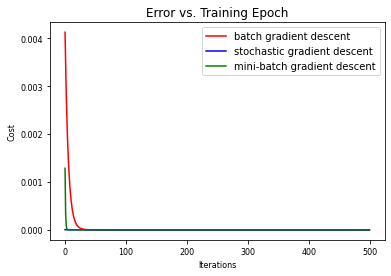

In [25]:
#plot the cost
fig, ax = plt.subplots()  
plt.rcParams.update({'font.size': 10})
resolution_value = 600
ax.plot(np.arange(max_iteration), cost, 'r')  
ax.plot(np.arange(max_iteration), s_cost, 'b')  
ax.plot(np.arange(max_iteration), mb_cost, 'g')  
ax.legend(loc='upper right', labels=['batch gradient descent', 'stochastic gradient descent', 'mini-batch gradient descent'])
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  
plt.savefig("myImage2.png", format="png", dpi=resolution_value)
plt.show()

### Visualize the Data

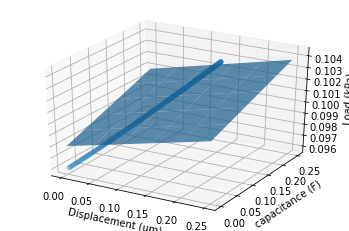

In [26]:
# Fixing random state for reproducibility
# np.random.seed(19680801)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.rcParams.update({'font.size': 8})
resolution_value = 600
xs = X[:, 0]
ys = X[:, 1]
zs = Y
ax.scatter(xs, ys, zs)

ax.set_xlabel('Displacement (um)')
ax.set_ylabel('capacitance (F)')
ax.set_zlabel('Load (kPa)')

x = y = np.arange(0, 0.3, 0.05)
xp, yp = np.meshgrid(x, y)
z = np.array([h(theta, np.array([[x,y]]))[0, 0] for x,y in zip(np.ravel(xp), np.ravel(yp))])
zp = z.reshape(xp.shape)

ax.plot_surface(xp, yp, zp, alpha=0.7)
plt.savefig("Batch Gradient Descent.png", format="png", dpi=resolution_value)    
plt.show()




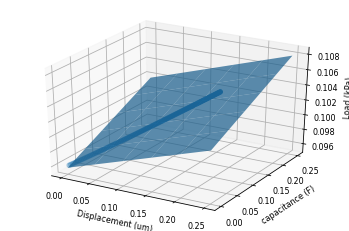

In [27]:
# Fixing random state for reproducibility
# np.random.seed(19680801)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.rcParams.update({'font.size': 8})
resolution_value = 600

xs = X[:, 0]
ys = X[:, 1]
zs = Y
ax.scatter(xs, ys, zs)

ax.set_xlabel('Displacement (um)')
ax.set_ylabel('capacitance (F)')
ax.set_zlabel('Load (kPa)')


x = y = np.arange(0, 0.3, 0.05)
xp, yp = np.meshgrid(x, y)
z = np.array([h(s_theta, np.array([[x,y]]))[0, 0] for x,y in zip(np.ravel(xp), np.ravel(yp))])
zp = z.reshape(xp.shape)

ax.plot_surface(xp, yp, zp, alpha=0.7)
plt.savefig("Mini-Batch Gradient Descent.png", format="png", dpi=resolution_value)     
plt.show()

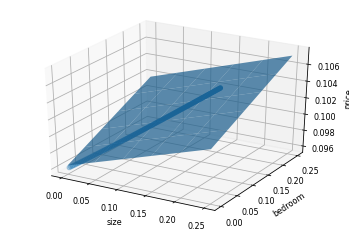

In [28]:
# Fixing random state for reproducibility
# np.random.seed(19680801)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.rcParams.update({'font.size': 8})
resolution_value = 600

x = y = np.arange(0, 0.3, 0.05)
xp, yp = np.meshgrid(x, y)
z = np.array([h(mb_theta, np.array([[x,y]]))[0, 0] for x,y in zip(np.ravel(xp), np.ravel(yp))])
zp = z.reshape(xp.shape)
ax.plot_surface(xp, yp, zp, alpha=0.7)

xs = X[:, 0]
ys = X[:, 1]
zs = Y
ax.scatter(xs, ys, zs)


ax.set_xlabel('size')
ax.set_ylabel('bedroom')
ax.set_zlabel('price')
plt.savefig("Stochastic Gradient Descent.png", format="png", dpi=resolution_value)     
plt.show()

AttributeError: ignored